In [5]:
#Shaquiel Pashtunyar
#DSC650 Assignment 5.1

## Assignment 5.1 Deep learning with Movie classifier

In [6]:
#Importing data from tensor flow
from tensorflow.keras.datasets import imdb

In [7]:
# Getting the data into my tables
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [34]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [35]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
#Removing max sequence
word_index = imdb.get_word_index()

# reverse it by mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Decode the review - indices are offset by 3 because 0, 1, 2 are reserved, indices for "padding", "start of sequence" and "unknown"
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [37]:
# create my training and testing dataset
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
# my target to go along with the x
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [19]:
# Keras implementation
from keras import models
from keras import layers

In [20]:
#Sequential modeling
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [22]:
from keras import optimizers

In [23]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

C:\Users\spashtunyar\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [39]:
#Adding losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
# finally time to train my model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5268 - binary_accuracy: 0.7945 - val_loss: 0.4029 - val_binary_accuracy: 0.8682
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3208 - binary_accuracy: 0.9008 - val_loss: 0.3185 - val_binary_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2354 - binary_accuracy: 0.9243 - val_loss: 0.3049 - val_binary_accuracy: 0.8742
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1855 - binary_accuracy: 0.9393 - val_loss: 0.2846 - val_binary_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1504 - binary_accuracy: 0.9515 - val_loss: 0.2840 - val_binary_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1279 - binary_accuracy: 0.9591 - val_loss: 0.2901 - val_binary_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - los

In [27]:
#creating dictionary keys
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

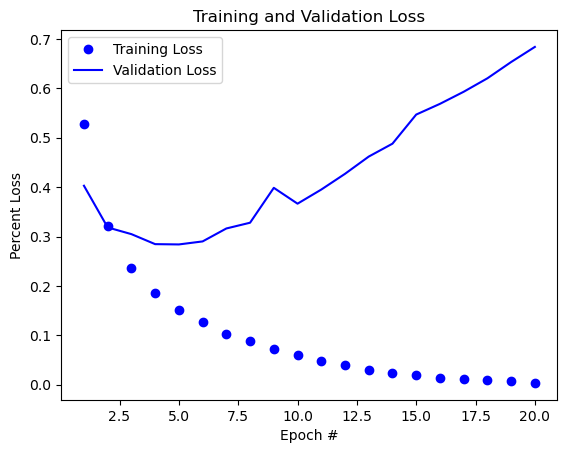

In [29]:
#Plotting the training data with pyplot
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict["binary_accuracy"]
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Percent Loss')
plt.legend()
plt.show()

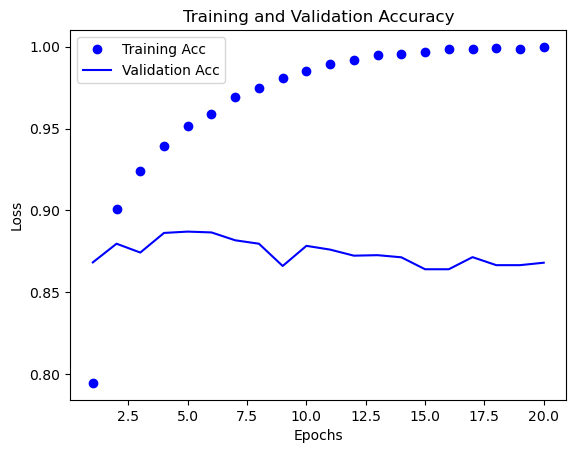

In [30]:
# plot training & validation accuracy
plt.clf() # clears figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4739 - accuracy: 0.8141
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2692 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2037 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2922 - accuracy: 0.8839


In [32]:
results

[0.29221242666244507, 0.8839200139045715]

In [33]:
#Test Predictions
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.18759479],
       [0.99955153],
       [0.8243988 ],
       ...,
       [0.09366523],
       [0.06851666],
       [0.4542775 ]], dtype=float32)

## Part 2 Implementing 3.5 classifier

In [40]:
#Getting reuters dataset
import keras
from keras.datasets import reuters

In [41]:
#Same set, getting reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [43]:
print(len(train_data))

8982


In [44]:
print(len(test_data))

2246


In [45]:
print(train_data[10])


[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [46]:
word_index=reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [48]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results

In [50]:
#Creating training datasets
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [51]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
            results[i, label]=1.
    return results

In [52]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [53]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [54]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [57]:
model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics='accuracy')

In [58]:
x_val= x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [60]:
#20 EPOCHS model training
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1096 - accuracy: 0.9585 - val_loss: 1.1502 - val_accuracy: 0.7940
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 0.1078 - accuracy: 0.9574 - val_loss: 1.1601 - val_accuracy: 0.7970
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 0.1049 - accuracy: 0.9580 - val_loss: 1.1908 - val_accuracy: 0.7930
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.1008 - accuracy: 0.9577 - val_loss: 1.2393 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1050 - accuracy: 0.9559 - val_loss: 1.1985 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0969 - accuracy: 0.9594 - val_loss: 1.1530 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0999 - accuracy: 0.9605 - val_loss: 1.2202 - val_accuracy: 0.7950
Epoch 8/20
16

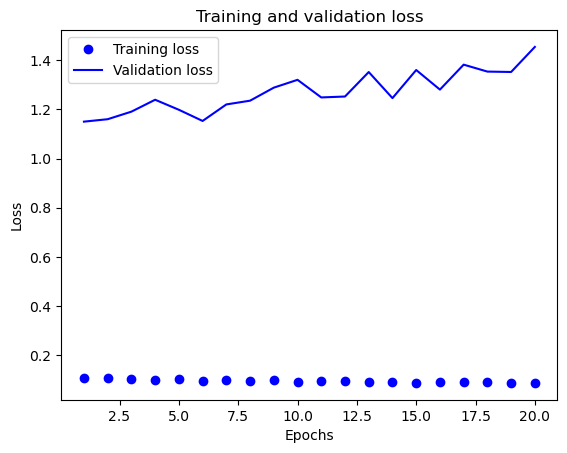

In [61]:
#plotting the results, same code as above from section 1
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss


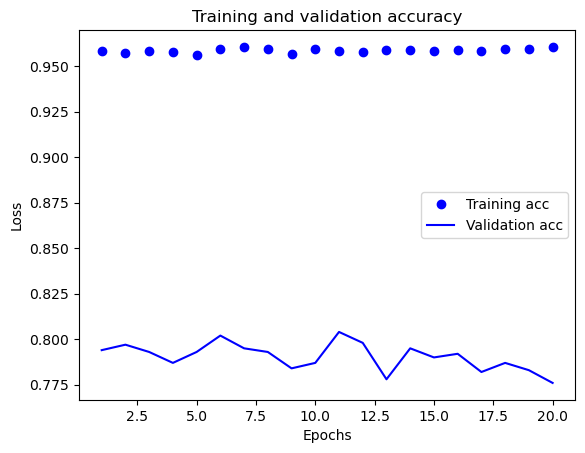

accuracy


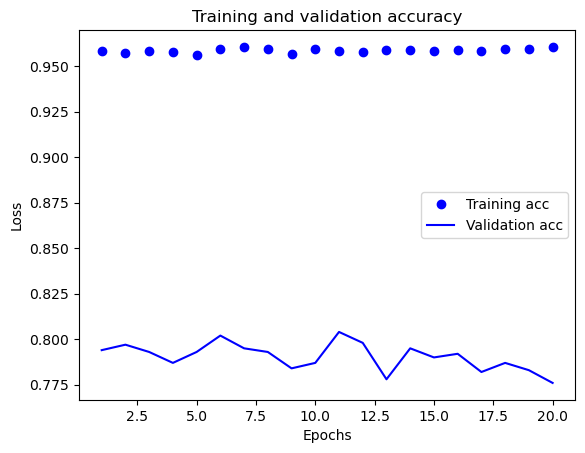

val_loss


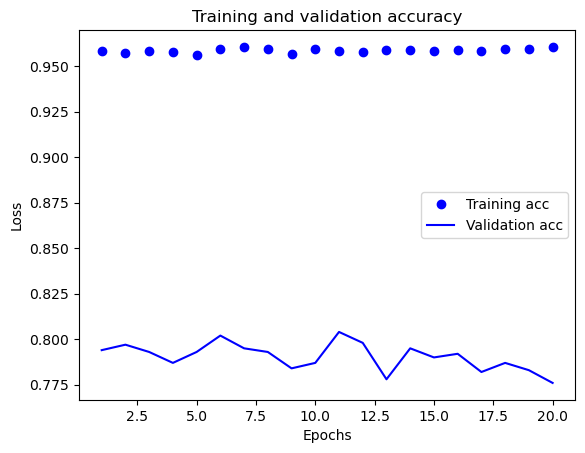

val_accuracy


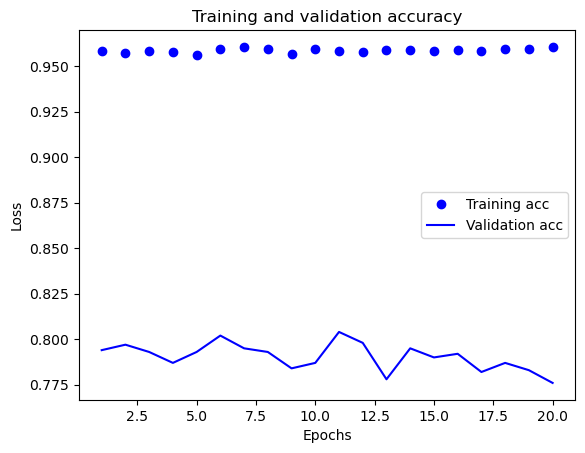

In [64]:
for key in history.history.keys():
    print(key)
    

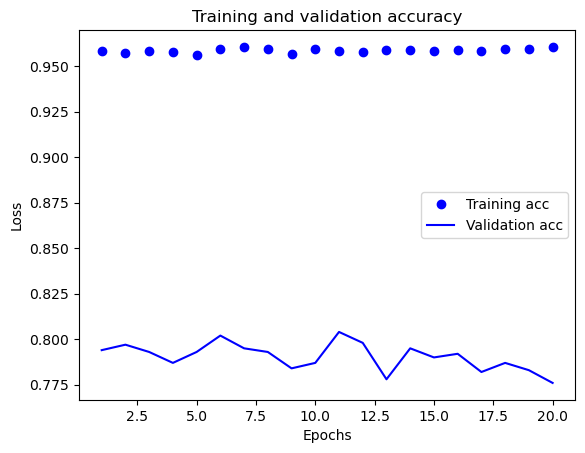

In [68]:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [69]:
# retrain model from scratch
model = models.Sequential([
  layers.Dense(64, activation="relu", input_shape = (10000,)),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 34ms/step - loss: 2.6953 - accuracy: 0.5237 - val_loss: 1.7832 - val_accuracy: 0.6310
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.4653 - accuracy: 0.6911 - val_loss: 1.3148 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 21ms/step - loss: 1.0693 - accuracy: 0.7757 - val_loss: 1.1222 - val_accuracy: 0.7690
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8325 - accuracy: 0.8286 - val_loss: 1.0087 - val_accuracy: 0.7900
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.6594 - accuracy: 0.8652 - val_loss: 0.9784 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5300 - accuracy: 0.8919 - val_loss: 0.9290 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4256 - accuracy: 0.9119 - val_loss: 0.8883 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [70]:
results

[0.9964867830276489, 0.7876224517822266]

In [71]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) /len(test_labels)

0.1918967052537845

In [72]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [73]:

predictions[0].shape

(46,)

In [74]:
np.sum(predictions[0])

1.0000004

In [75]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [76]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [77]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 2.8058 - accuracy: 0.2565 - val_loss: 1.9797 - val_accuracy: 0.6020
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5739 - accuracy: 0.6031 - val_loss: 1.4724 - val_accuracy: 0.6010
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2589 - accuracy: 0.6506 - val_loss: 1.3555 - val_accuracy: 0.6480
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0997 - accuracy: 0.7035 - val_loss: 1.2851 - val_accuracy: 0.6910
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9798 - accuracy: 0.7507 - val_loss: 1.2536 - val_accuracy: 0.7120
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8806 - accuracy: 0.7701 - val_loss: 1.2448 - val_accuracy: 0.7220
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.7972 - accuracy: 0.7908 - val_loss: 1.2692 - val_accuracy: 0.7200
Epoch 8/20
63/63 [

In [79]:
# we got 72% accuracy which isn't to bad

## 5.3 Housing price regression with deep learning 

In [80]:
#Housing data from keras
from keras.datasets import boston_housing

In [81]:
#Same data load method
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [83]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [84]:
# data preparation
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [85]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [86]:

import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [87]:
#scores from previous processing
all_scores

[1.9889638423919678,
 2.4483425617218018,
 2.4551186561584473,
 2.4192421436309814]

In [88]:
#average of the 4
np.mean(all_scores)

2.3279168009757996

In [89]:
# save validation logs for each fold
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [90]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

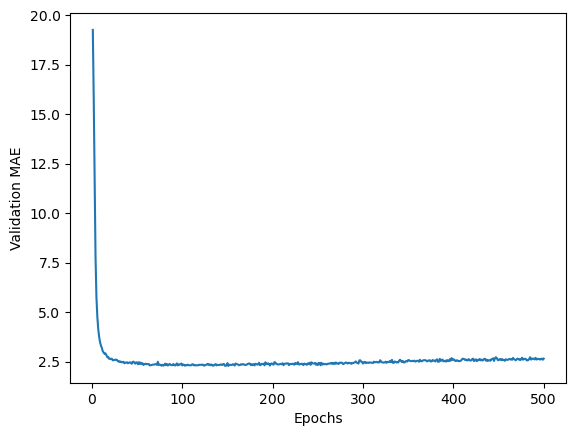

In [91]:
# ploting the results and MAE
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [92]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

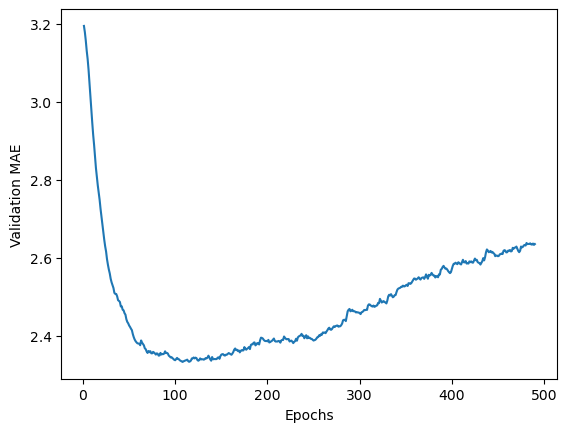

In [93]:
# plot validation scores but excluding the first points to remove the deep curve we saw from the previous plot
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [94]:
# train the model
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.5741 - mae: 2.7417


In [95]:
#Testing mae score
test_mae_score

2.741657257080078

In [96]:
# off by not much at all